In [1]:
from sympy import var,Function
from ComputabilityGraphs.CMTVS import CMTVS
from bgc_md2.helper import bgc_md2_computers
from bgc_md2.resolve.mvars import (
    InFluxesBySymbol,
    OutFluxesBySymbol,
    InternalFluxesBySymbol,
    TimeSymbol,
    StateVariableTuple,
)

In [2]:
#define all the symbols you are going to use in the equations
var("""
    C_leaf 
    C_wood
    k_leaf2wood
    k_wood2leaf
    k_leaf2out
    k_wood2out
""")
I_leaf=Function("I_leaf") # We can also represent functions symbolically
I_wood=Function("I_wood") 
t=TimeSymbol("t") # the symbol used for time since it has a special role

In [3]:
# formulate the model
mvs = CMTVS(
    {
        StateVariableTuple( # the pool names in your preferred order
            (
                C_leaf,
                C_wood
            )
        ), 
        t, 
        InFluxesBySymbol({
            C_leaf: I_leaf(t), 
            C_wood: I_wood(t)
        }),
        OutFluxesBySymbol({
            C_leaf: k_leaf2out * C_leaf,
            C_wood: k_wood2out * C_wood
        }),
        InternalFluxesBySymbol({
            (C_leaf, C_wood): k_leaf2wood* C_leaf, 
            (C_wood, C_leaf): k_wood2leaf * C_wood}),
    },
    bgc_md2_computers()

)

In [4]:
#start to query the model description..
mvs.get_CompartmentalMatrix()

{InputTuple,CompartmentalMatrix}
{OutFluxesBySymbol,CompartmentalMatrix,InternalFluxesBySymbol,InputTuple,InFluxesBySymbol,SmoothReservoirModel}
{OutFluxesBySymbol,CompartmentalMatrix,InternalFluxesBySymbol,InputTuple,InFluxesBySymbol,SmoothReservoirModel}


Matrix([
[-k_leaf2out - k_leaf2wood,               k_wood2leaf],
[              k_leaf2wood, -k_wood2leaf - k_wood2out]])

In [5]:
mvs.get_InputTuple()

Matrix([
[I_leaf(t)],
[I_wood(t)]])

In [13]:
mvs.get_StateVariableTuple()

Matrix([
[C_leaf],
[C_wood]])

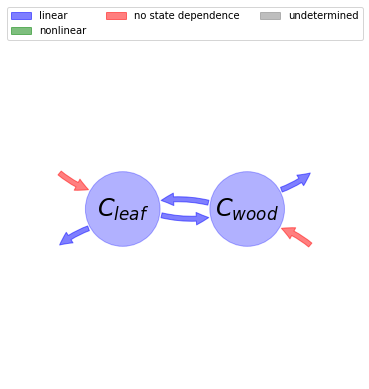

In [6]:
from bgc_md2.helper import compartmental_graph
compartmental_graph(mvs)

In [7]:
from bgc_md2.display_helpers import mass_balance_equation
mass_balance_equation(mvs)

HTML(value='<style>.container { width:100% !important; }</style>')

<IPython.core.display.Math object>

In [8]:
# for comparison the century model as found in our database
from bgc_md2.models.Parton1987SoilSciSocAmJ.source_by_name import mvs as mvs_century

In [9]:
mvs_century.get_CompartmentalMatrix()

{OutFluxesBySymbol,InternalFluxesBySymbol,InFluxesBySymbol,NumericStartValueArray,SmoothReservoirModel}
{OutFluxesBySymbol,CompartmentalMatrix,InternalFluxesBySymbol,NumericStartValueDict,InputTuple,InFluxesBySymbol,NumericStartValueArray,SmoothReservoirModel}


Matrix([
[                 -K_ssl*f_T*f_W*exp(-3*Ls),                  0,                                         0,                 0,                                              0,                   0,                   0],
[                                         0,     -K_msl*f_T*f_W,                                         0,                 0,                                              0,                   0,                   0],
[                                         0,                  0,                  -K_sl*f_T*f_W*exp(-3*Ls),                 0,                                              0,                   0,                   0],
[                                         0,                  0,                                         0,     -K_ml*f_T*f_W,                                              0,                   0,                   0],
[K_ssl*f_T*f_W*(0.55 - 0.55*A_l)*exp(-3*Ls), 0.45*K_msl*f_T*f_W, K_sl*f_T*f_W*(0.45 - 0.45*A_l)*exp(-3*Ls), 0.45*K_ml*f

In [10]:
mvs_century.get_InputTuple()

Matrix([
[J_surf*(0.018*LN + 0.15)],
[J_surf*(0.85 - 0.018*LN)],
[J_soil*(0.018*LN + 0.15)],
[J_soil*(0.85 - 0.018*LN)],
[                       0],
[                       0],
[                       0]])

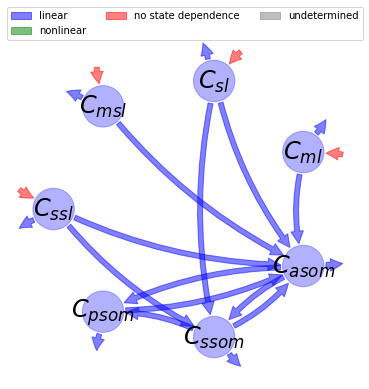

In [11]:
compartmental_graph(mvs_century)

In [12]:
BI=mvs_century.get_BibInfo()
BI.sym_dict

{'C_ssl': 'structural soil surface litter pool',
 'C_msl': 'metabolic soil surface litter pool',
 'C_sl': 'structural soil litter pool',
 'C_ml': 'metabolic soil litter pool',
 'C_asom': 'active soil organic matter pool',
 'C_ssom': 'slow soil organic matter pool',
 'C_psom': 'passive soil organic matter pool',
 'K_ssl': 'maximum decomposition rate of structural soil surface litter',
 'K_msl': 'maximum decomposition rate of metabolic soil surface litter',
 'K_sl': 'maximum decomposition rate of structural soil litter',
 'K_ml': 'maximum decomposition rate of metabolic soil litter',
 'K_asom': 'maximum decomposition rate of active soil organic matter',
 'K_ssom': 'maximum decomposition rate of slow soil organic matter',
 'K_psom': 'maximum decomposition rate of passive organic matter',
 'k_ssl': 'decomposition rate of structural soil surface litter',
 'k_sl': 'decomposition rate of structural soil litter',
 'k_asom': 'decomposition rate of active soil organic matter',
 'LN': 'lignin-to-